In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq import *
from qiskit.tools.monitor import job_monitor
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

This notebook runs Quantum Fourier Transform for $|0000\rangle$ input in both the simulator and a real quantum computer.

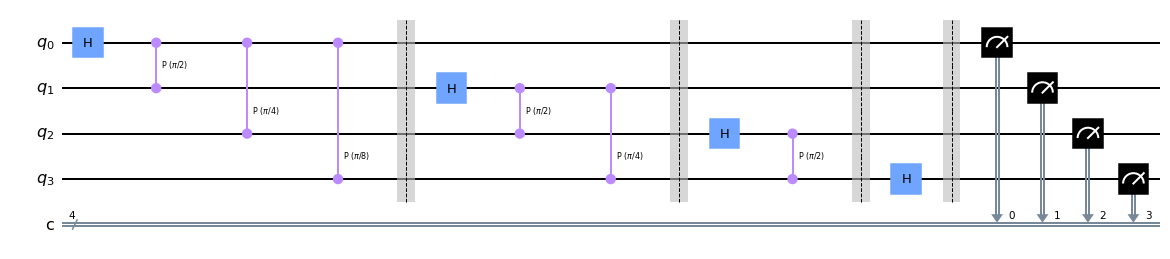

In [2]:
n=4
N=2**n
qc = QuantumCircuit(n,n)
for q in range(n):
    qc.h(q)
    for k in range(q+1,n):
        qc.cp(np.pi/(2**(k-q)),k,q)
    qc.barrier()
mes=range(n)
qc.measure(mes,mes)
qc.draw('mpl')

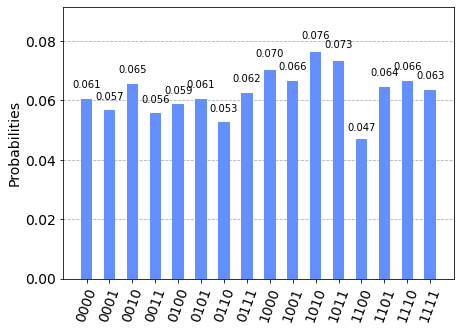

In [3]:
sim = Aer.get_backend('qasm_simulator')
res = execute(qc,backend=sim,shots=1024).result()
counts = res.get_counts()
plot_histogram(counts)

In [4]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True and x.name()!='ibmq_bogota'))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


In [5]:
job = execute(qc, backend)
job_monitor(job)

Job Status: job has successfully run


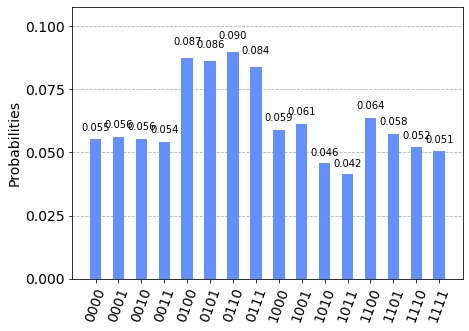

In [6]:
counts = job.result().get_counts()
plot_histogram(counts)